In [1]:
!pip install networkx

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import copy
import random

In [2]:
from tqdm import tqdm

In [19]:
edges = pd.read_csv("data/wikigraph_reduced.csv", sep = "\t")
# edges.drop('Unnamed: 0', inplace = True)
edges.columns = ['index', "source", "dest"] # update the column name 

In [20]:
edges.drop(['index'], axis = 1, inplace = True)
edges

,source,dest
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222
...,...,...
483089,1791481,1060990
483090,1791481,1061382
483091,1791481,1110380
483092,1791482,80740


In [26]:
categories = pd.read_csv("data/wiki-topcats-categories.txt", sep=";", names = ["Category", "Pages List"])
categories["Category"] = categories.Category.apply(lambda x: x[9:])
categories["Pages List"] = categories["Pages List"].apply(lambda x: x.split())
categories

,Category,Pages List
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
...,...,...
17359,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17360,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17361,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


In [23]:
col_1 = []
col_2 = []
f=  open (r'data/wiki-topcats-page-names.txt', 'r')
count = 0
for file in tqdm(f):
    z = file.split(' ',maxsplit = 1)
    col_1.append(z[0])
    col_2.append(z[1].replace('\n', ''))

1791489it [00:05, 308171.02it/s]


In [24]:
page_names = pd.DataFrame()
page_names['index'] = col_1
page_names['name'] =  col_2
page_names.to_csv('page_names.csv')

In [25]:
page_names = pd.read_csv('page_names.csv')

In [31]:
G = nx.DiGraph()
for i in tqdm(range(len(edges[:]))):
    G.add_edge(edges.loc[i][0], edges.loc[i][1])

100%|████████████████████████████████████████████████████████████████████████| 483094/483094 [04:14<00:00, 1896.49it/s]


In [ ]:
## Is graph directed,
As we can see from the edges dataframe graph is directed.

G.

In [29]:
# Number of articles
print('No of article are {}'.format(len(set.union(set(edges['source'].unique()), set(edges['dest'].unique())))))

No of article are 98343


In [30]:
# Number of edges
print('No of edges are {}'.format( len(edges)))

No of edges are 483094


In [ ]:
# Compute the average number of links in an arbitrary page
np.mean(list(dict(G.degree).values()))

In [34]:
# Let's calculate density of a graph,
# As we can see the value of density is small hence we can conlude that it is sparse

n = len(G.nodes)
m = len(G.edges)
print("Density of graph is {}".format(m/(n*(n-1))))

Density of graph is 4.9951571365597335e-05


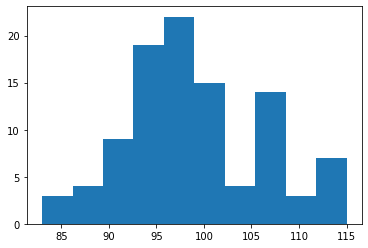

In [41]:
# PLotting degree didtrubution 

def degree_dist(G):
    d = [G.degree(n) for n in G.nodes()]
    plt.hist(d)
    plt.show()

degree_dist(nx.gnp_random_graph(100, 0.5
                                , directed=True))

In [60]:
edge = []
for i, j in tqdm(zip(edges['source'], edges['dest'])):
    edge.append((i,j))

483094it [00:01, 418637.48it/s]


In [61]:
edge_dict = { }
for i in tqdm(edge):
    if i[0] in edge_dict:
        edge_dict[i[0]].append(i[1])
    else:
        edge_dict[i[0]] = []
        edge_dict[i[0]].append(i[1])

100%|██████████████████████████████████████████████████████████████████████| 483094/483094 [00:02<00:00, 235062.65it/s]


In [122]:
source_node = list(edges["source"])
dest_node = list(edges["dest"])
links = []
for i,j in zip(edges['source'],edges['dest']):
    links.append((i,j))

In [123]:
edge_dict = defaultdict(list)
for i in range(len(source_node)):
    edge_dict[source_node[i]].append(dest_node[i])

In [124]:
edge_dict

defaultdict(list,
            {95: [1185516],
             108: [1059989, 1062426, 1161925],
             134: [541222, 1061485, 1163610, 1163783],
             153: [744272,
              1064807,
              1065282,
              1085943,
              1125916,
              1130618,
              1161083,
              1162104,
              1162238],
             167: [645690, 804311],
             173: [174,
              146870,
              1059766,
              1059906,
              1060905,
              1061638,
              1067692,
              1130481,
              1163227,
              1166373,
              1223897],
             174: [1061112, 1061313, 1063717, 1065339],
             980: [1067601],
             1086: [655218, 1063591, 1773335],
             1087: [1088,
              82897,
              301688,
              743828,
              1028633,
              1057862,
              1062055,
              1063918,
              1161725,
            

In [73]:
def No_of_clicks(given_list, c):
    b = c
    given_list = given_list
    click = []
    list_std = []
    while b >0 :
        z = []
        for i in tqdm(given_list):
        #         print(i)
            try:        
                for j in edge_dict[i]: 
                    z.append(j)
                    click.append(j)       
            except:
                pass

        given_list =z
        b = b - 1 
    return click

In [75]:
source_node = int(input('please enter the source node '))
c = int(input('How many clicks you want '))
given_list = [source_node]
Total_nodes_reched = No_of_clicks(given_list, c)

please enter the source node 134
How many clicks you want 3


100%|█████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<00:00, 64872.44it/s]


In [76]:
# No of nodes can be reached with given clicks
print(Total_nodes_reched)

[541222, 1061485, 1163610, 1163783, 536864, 538134, 543070, 1110882, 134, 62637, 355747, 358205, 530893, 823545, 1025352, 1025885, 1026878, 1053045, 1056077, 1056294, 1056873, 1056874, 1056964, 1056966, 1057565, 1057624, 1057685, 1058035, 1058047, 1058420, 1058860, 1059622, 1060082, 1060600, 1060768, 1061245, 1061249, 1061352, 1061422, 1061427, 1061444, 1061445, 1061450, 1061452, 1061461, 1061463, 1061466, 1061486, 1061487, 1061488, 1061489, 1061494, 1061502, 1061503, 1061506, 1061507, 1061552, 1061564, 1061565, 1061606, 1061902, 1062637, 1062705, 1063007, 1065425, 1065712, 1065725, 1066078, 1162401, 1163140, 1163675, 1163706, 1163711, 1163712, 1163713, 1163717, 1163722, 1163723, 1163727, 1163732, 1163733, 1163735, 1163744, 1163754, 1246598, 1265236, 1265356, 1265367, 1265376, 1265422, 1266105, 1266113, 1266608, 1270720, 1400636, 1502817, 134, 19415, 339891, 573333, 574081, 636021, 696881, 771113, 789467, 925690, 930923, 1028354, 1049218, 1049509, 1050418, 1052967, 1056873, 1057478, 10

In [125]:
def bfs_counter(source , dest , edge_dict, keys):
    
#     d2 = copy.deepcopy(visited)

    queue = []
    counter = 0
    visited = defaultdict()
    for key in keys : 
        visited[key] = False
        for i in edge_dict[key]:
            visited[i] = False
#     if source == dest:
#         return counter
    
    queue.append(source)
#     d2[source] = True
    visited [source] = True
    if source != dest:
        
        while (len(queue) != 0) :

            u = queue[0] # start from first elemnt available at queue list 
            queue.pop(0)# delete this from queue and return it 
            neighbour = edge_dict[u]

            for i in neighbour:
                if visited[i] == False :
#                 if d2[i] == False:
#                     d2[i] = True
                    visited[i] = True 
                    queue.append(i) 
                    counter += 1 #to calculate path length 

                    if (i == dest):
                        return counter
    
    counter = np.infty
    return counter


In [162]:
def cat_clicks(cat, edge_dict):
    dictionary_of_indegree = dict(edges['source'].value_counts())
    maxi = []
    # for j in tqdm(range(1000)):
    the_list =  [int(i) for i in cat['Pages List'][0]]
    for i in the_list:
        try:
            maxi.append(( dictionary_of_indegree[i], i))
        except Exception as e:
            pass
    if len(maxi)>0 :
        start = max(maxi)[1]

        keys = edge_dict.keys()
        for i in the_list:
            counter = bfs_counter(start , i , edge_dict, keys )
            if counter != np.inf:
                print('Clicks required from {} to {} is {}'.format(start, i, counter))
            else:
                print('Not possible from {} to {}'.format(start, i))
    else:
        print(' Exception:  You don"t have node with in degree ')

In [163]:
cat = input('Please enter thr category ')
if cat in list(categories['Category']):
    cat = categories[categories['Category'] ==  cat].reset_index(drop=True)
    cat_clicks(cat, edge_dict)
else:
    print(' Exception:  INvalid category please try again ')

Please enter thr category People_from_Worcester
Not possible from 540020 to 1056
Not possible from 540020 to 1057
Not possible from 540020 to 1058
Not possible from 540020 to 1059
Not possible from 540020 to 1060
Not possible from 540020 to 60971
Not possible from 540020 to 76515
Not possible from 540020 to 76871
Not possible from 540020 to 78094
Clicks required from 540020 to 79069 is 44247
Not possible from 540020 to 79139
Clicks required from 540020 to 79143 is 51852
Not possible from 540020 to 80237
Not possible from 540020 to 84108
Not possible from 540020 to 84354
Not possible from 540020 to 84740
Not possible from 540020 to 85268
Not possible from 540020 to 85767
Clicks required from 540020 to 89734 is 51843
Not possible from 540020 to 90171
Not possible from 540020 to 95330
Not possible from 540020 to 158412
Not possible from 540020 to 166087
Not possible from 540020 to 194583
Not possible from 540020 to 196217
Not possible from 540020 to 216650
Not possible from 540020 to 2167

In [250]:
def bfs(source , dest , edge_dict , distance = defaultdict(),parent = defaultdict()):
    queue = []
    visited = defaultdict()
    distance = defaultdict()
    parent = defaultdict()
   
    
    if source == dest:
        return (False, print('Source and dest are same'))
    
    for node in edge_dict.keys():
        visited[node] = False
        distance[node] = np.inf
        parent [node] = -1
    for key in edge_dict.keys():
        for i in range(len(edge_dict[key])): 
            node = edge_dict[key][i]
            visited[node] = False
            distance[node] = np.inf
            parent [node] = -1
            
    queue.append(source)
    visited [source] = True
    while (len(queue) != 0) :
        u = queue[0] # start from first elemnt available at queue list 
        queue.pop(0)# delete this from queue and return it 
        neighbour = edge_dict[u]
        if len(neighbour) != 0:
            for i in range(len(neighbour)):
                if visited[neighbour[i]] == False :
                    visited[neighbour[i]] = True 
                    distance[neighbour[i]] = distance[u] + 1
                    parent[neighbour[i]] = u
                    queue.append(neighbour[i]) 
#                   counter += 1
                    if (neighbour[i] == dest):
                        return True , parent
#                         return True , counter
        
    return False,parent

In [251]:
def path_finder(source , dest , edge_dict):
    
    [result , parent] = bfs(source , dest , edge_dict , distance = defaultdict(),parent = defaultdict())
    
    if (result == False):
        print("Not Connected")
  
    # vector path stores the shortest path
    if (result == True):
        
        path = defaultdict(list)
        mid_node = dest
        path[mid_node].append("1")
        

    for key in parent.keys():
        if (parent[key] != -1):
            if parent[key] not in path.values():
            
                path[parent[key]].append("1")
#             mid_node = parent[mid_node]


    return path

In [252]:
def find_min_path_delete_to_disconnect(first_node, second_node, di):
    if first_node != second_node:
        dict_ = di
        counter = 0
        while (bfs(first_node , second_node,dict_)[0]==True):
            zz = path_finder(first_node , second_node, dict_)
            counter +=1
            new_data = edges[(~edges['source'].isin(list(zz)[1:]) )|(~edges['dest'].isin(list(zz)[1:]))]
        #     new_data = edges[~edges['dest'].isin(list(zz)[1:])]
            new_data.reset_index(drop=True, inplace = True)
            dict_ = defaultdict(list)

            for i in range(len(new_data)):
                dict_[new_data['source'][i]].append(new_data['dest'][i])
            edges = new_data
        if counter ==0 :
            print('Randomly choosen node are not connected')
        else:
            print("The minimum number of required path to delete connection between two node ",counter)
    else:
        print('Source and dest are same')

In [255]:
cat_1 = input('Please enter first category')
cat_2 = input('Please enter first category')
if cat_1 == cat_2:
    print('Please enter two different categories')
elif cat_1 not in list(categories['Category']):
    print('Please enter valid cat1')
elif cat_2 not in list(categories['Category']):
    print('Please enter valid cat2')

Please enter first categoryBuprestoidea
Please enter first categoryPeople_from_Worcester


In [256]:
cat_1 =categories[categories['Category']== cat_1].reset_index(drop = True)['Pages List'][0]
cat_2 = categories[categories['Category']== cat_2].reset_index(drop = True)['Pages List'][0]
cat_1 = [int(i) for i in cat_1]
cat_2 = [int(i) for i in cat_2]


# we are assuming that , They may be connected with the subgraph
temp_df = edges[edges['source'].isin(cat_1+cat_2) | edges['dest'].isin(cat_1 + cat_2)].reset_index(drop=True)
source_node_cat = list(temp_df["source"])
dest_node_cat = list(temp_df["dest"])
edge_dict_cat = defaultdict(list)
for i in range(len(source_node_cat)):
    edge_dict_cat[source_node_cat[i]].append(dest_node_cat[i])
u = random.choice(cat_1)
v = random.choice(cat_2)

find_min_path_delete_to_disconnect(u, v, edge_dict_cat)

Randomly choosen node are not connected


In [257]:
def bfs_counter(source , dest , edge_dict, keys,visited ):
    
    queue = []
    counter = 0

    
    queue.append(source)

    visited [source] = True
    if source != dest:
        
        while (len(queue) != 0) :

            u = queue[0] # start from first elemnt available at queue list 
            queue.pop(0)# delete this from queue and return it 
            neighbour = edge_dict[u]

            for i in neighbour:
                if visited[i] == False :

                    visited[i] = True 
                    queue.append(i) 
                    counter += 1 #to calculate path length 

                    if (i == dest):
                        return counter
    
    counter = np.infty
    return counter


In [258]:
edges_ = edges.copy(deep=True)
edges_ = edges_[edges_['source']>5000]
edges_ = edges_[edges_['source']<30000]
edges_ = edges_[edges_['dest']>5000]
edges_ = edges_[edges_['dest']<30000]
edges_
source_node_ = list(edges_["source"])
dest_node_ = list(edges_["dest"])
edge_dict_re = defaultdict(list)
for i in range(len(source_node_)):
    edge_dict_re[source_node_[i]].append(dest_node_[i])
len(edge_dict),len(edge_dict_re)

(95013, 77)

In [260]:
def category_reducer(cat):
    main_cat =categories[categories['Category']== cat].reset_index(drop = True)['Pages List'][0]
# cat_1 = [int(i) for i in main_cat]
    cat_ = [int(i) for i in main_cat if int(i)<30000 and int(i)>5000]
    return cat_

In [261]:
category = categories.copy(deep=True)
category['Reduce_Page_list'] = category['Category'].apply(category_reducer)
category = category[category['Reduce_Page_list'].map(lambda d: len(d) > 0) ]

In [164]:
main_cat = 'British_science_fiction_novels'
main_cat =category[category['Category']== main_cat].reset_index(drop = True)['Pages List'][0]
# cat_1 = [int(i) for i in main_cat]
cat_1 = [int(i) for i in main_cat if int(i)<30000 and int(i)>5000]

# all_cat = categories[categories['Category']!= main_cat].reset_index(drop = True)['Pages List'][0]
all_cat = category[~(category['Category']== 'British_science_fiction_novels')]
all_cat['Category']

[16110, 24545]

In [251]:
a=[]
b=[]
for cat in tqdm(all_cat['Category']) :
    
    cat_2 = category[category['Category']== cat ].reset_index(drop = True)['Reduce_Page_list'][0]
    
    temp_df = edges_[edges_['source'].isin(cat_1+cat_2) | edges_['dest'].isin(cat_1 + cat_2)].reset_index(drop=True)
    source_node_cat = list(temp_df["source"])
    dest_node_cat = list(temp_df["dest"])

    edge_dict_cat = defaultdict(list)
    for i in range(len(source_node_cat)):
        edge_dict_cat[source_node_cat[i]].append(dest_node_cat[i])

    median_collector = []

    keys = edge_dict_re.keys()
    visited = defaultdict()
    for key in keys : 
        visited[key] = False
        for i in edge_dict_re[key]:
            visited[i] = False

    for source in source_node_cat:
        for dest in dest_node_cat:

            visit =  copy.deepcopy(visited)
            counter = bfs_counter(source , dest , edge_dict_re, keys,visit)

            if counter != np.inf :
                median_collector.append(counter)

                a.append([counter,source,dest])
                
    if len(median_collector)>=1 :
        b.append(('British_science_fiction_novels' , cat , np.median(median_collector)))



100%|██████████| 4939/4939 [00:27<00:00, 179.71it/s]


In [256]:
cat_name= []
distance = []
for i in b :
    cat_name.append(i[1])
    distance.append(i[2])
sorted_df = pd.DataFrame()
sorted_df['cat_name'] = cat_name
sorted_df['distance'] = distance
sorted_df

,cat_name,distance
0,Strategic_Air_Command,1.0
1,Abraham_Lincoln,1.0
2,Romanian_people_of_Hungarian_descent,1.0
3,Expatriate_footballers_in_Romania,4.0
4,Romanian_football_managers,3.0
...,...,...
262,Expatriate_footballers_in_Peru,1.0
263,Club_Atltico_Independiente_footballers,1.0
264,Primera_Divisin_Argentina_players,1.0
265,Expatriate_footballers_in_Mexico,2.0


In [262]:
sorted_df.sort_values(by=['distance'],ascending=False)

,cat_name,distance
260,Slovakia_international_footballers,11.0
261,Slovak_footballers,11.0
141,OFK_Beograd_players,9.0
152,Portuguese_expatriate_footballers,7.0
160,Estrela_da_Amadora_players,7.0
...,...,...
118,FC_Sion_players,1.0
119,Computer_programmers,1.0
120,American_technology_writers,1.0
121,Year_of_death_missing,1.0


In [8]:
# dealing with unorganized pattern in data 
# we need to eliminate number before each category name and create extra columns for the 
# changing data frame to list :
node_number = []
node_name = []
cat_list = list(page_names["node_title"])
for cat in cat_list:
    A = cat.split()
    node_number.append(A[0])
    node_name.append(''.join(cat.split()[1:]))

In [9]:
page_names["node_number"]= node_number
page_names["node_name"] = node_name

In [10]:
page_names = page_names.drop(columns="node_title")

In [11]:
page_names.head()

,node_number,node_name
0,0,Chiasmalsyndrome
1,1,Kleroterion
2,2,Pinakion
3,3,LyndonHochschildSerrespectralsequence
4,4,Zariski'smaintheorem


In [159]:
categories = pd.read_csv("wiki-topcats-categories.txt", sep=";", names = ["Category", "Pages List"])
categories
categories["Category"] = categories.Category.apply(lambda x: x[9:])
categories["Pages List"] = categories["Pages List"].apply(lambda x: x.split())
categories

,Category,Pages List
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
...,...,...
17359,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17360,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17361,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


#### at first srep I create a dictionary that shows wich node belongs to what categories so the keys are page number  and the values are categories they belong
#### As we know we are assuming page numbers as nodes and first data set show us wich page is link with other in following we will also create a dictionary for those 


In [147]:
# first creat list of all available categories and all available page numbers 
category_list = list(categories["Category"])
page_list = list(categories["Pages List"])

In [14]:
# category_list

In [15]:
category_dict_name = defaultdict(list)
category_dict = defaultdict(list)
for i in range(len(page_list)):
    for j  in range(len(page_list[i])):
        num = page_list[i][j]
        category_dict_name[int(num)].append(category_list[i])
        category_dict[int(num)].append(i)

In [173]:
# category_dict_name , category_dict
category_dict_name

defaultdict(list,
            {301: ['Buprestoidea'],
             302: ['Buprestoidea'],
             303: ['Buprestoidea', 'Insect_families'],
             304: ['Buprestoidea'],
             305: ['Buprestoidea'],
             306: ['Buprestoidea'],
             307: ['Buprestoidea'],
             308: ['Buprestoidea'],
             309: ['Buprestoidea'],
             310: ['Buprestoidea'],
             311: ['Buprestoidea'],
             312: ['Buprestoidea'],
             313: ['Buprestoidea'],
             314: ['Buprestoidea'],
             315: ['Buprestoidea'],
             316: ['Buprestoidea'],
             317: ['Buprestoidea'],
             318: ['Buprestoidea'],
             319: ['Buprestoidea'],
             320: ['Buprestoidea'],
             321: ['Buprestoidea'],
             322: ['Buprestoidea'],
             323: ['Buprestoidea'],
             324: ['Buprestoidea'],
             325: ['Buprestoidea'],
             326: ['Buprestoidea'],
             327: ['Buprest

In [17]:
import random
len(category_dict_name[5319])
random.randint(0,len(category_dict_name[5319])-1)
category_dict_name[5319][random.randint(0,len(category_dict_name[5319])-1)]

'Medical_signs'

### since one of the basic data structures that we can use to represent graphs are dictionary so I create a dictionary wich has key values equal to node and values equal to other nodes that are connected to key :

In [18]:
source_node = list(edges["source"])
dest_node = list(edges["dest"])

In [19]:
source_node[1]

108

In [20]:
edge_dict = defaultdict(list)
for i in range(len(source_node)):
    edge_dict[source_node[i]].append(dest_node[i])

In [20]:
temp_df = edges[edges['source'].isin(cat_1+cat_2) | edges['dest'].isin(cat_1 + cat_2)].reset_index(drop=True)
source_node_cat = list(temp_df["source"])
dest_node_cat = list(temp_df["dest"])
edge_dict_cat = defaultdict(list)
for i in tqdm(range(len(source_node_cat))):
    edge_dict_cat[source_node_cat[i]].append(dest_node_cat[i])

NameError: name 'cat_1' is not defined

In [84]:
len(edge_dict_cat)

41285

In [71]:
cat_1, cat_2

([95,
  108,
  112,
  113,
  190,
  254,
  1413,
  1451,
  1452,
  1464,
  1512,
  1546,
  2528,
  2700,
  21730,
  30090,
  31695,
  31718,
  31722,
  31725,
  31726,
  31728,
  35997,
  36769,
  40216,
  40451,
  40526,
  44815,
  46809,
  63667,
  68805,
  70561,
  71208,
  72454,
  72470,
  72473,
  73236,
  75049,
  75402,
  94544,
  96547,
  103884,
  103890,
  104986,
  108028,
  108253,
  108273,
  109350,
  109362,
  109388,
  109473,
  109482,
  109494,
  109516,
  109547,
  109551,
  110124,
  110379,
  110385,
  110390,
  110461,
  111102,
  111128,
  114125,
  114126,
  114129,
  114131,
  115321,
  134076,
  134455,
  134462,
  134468,
  139362,
  139865,
  139885,
  139892,
  139907,
  139914,
  139925,
  139927,
  139943,
  139974,
  139979,
  139981,
  139984,
  140027,
  140030,
  140035,
  140046,
  140088,
  140134,
  140147,
  140159,
  140160,
  140260,
  140265,
  140308,
  140325,
  140353,
  140361,
  140373,
  140380,
  140424,
  140480,
  140482,
  140493,
  

### You will notice that one article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random. Please, do it before solving any task in the homework.

### to solve this we are working with categories that has page number available in first data set and just randomly specified one uniwue category for each node :


In [167]:
all_nodes = set(list(edges["source"])).union(set(list(edges["dest"])))


In [168]:
mutuall_nodes = all_nodes.intersection(set(category_dict_name.keys()))

In [169]:
# update dictionary of categories in both available versions 
dict_cat_name = defaultdict(list)
dict_cat = defaultdict(list)
for key in mutuall_nodes:
    R = random.randint(0,len(category_dict_name[key])-1)
    dict_cat_name[key] = category_dict_name[key][R]
    dict_cat[key] = category_dict[key][R]
        
    
    

In [170]:
dict_cat_name

defaultdict(list,
            {1048576: 'Year_of_birth_missing',
             1048577: 'Fellows_of_University_College,_Oxford',
             1048578: 'Year_of_birth_missing',
             1048579: 'Alumni_of_University_College,_Oxford',
             786432: 'Rivers_of_the_Mure_subbasin',
             786433: 'Rivers_of_Hunedoara_County',
             1048582: 'Year_of_birth_missing',
             1048583: 'English_Anglican_priests',
             1048584: 'English_Anglican_priests',
             1048585: 'Fellows_of_University_College,_Oxford',
             1048586: 'Year_of_birth_missing',
             1048587: 'Year_of_birth_missing',
             1048588: 'Year_of_death_missing',
             1048589: 'Year_of_death_missing',
             786439: 'Rivers_of_Suceava_County',
             786441: 'Rivers_of_Neam_County',
             786442: 'Rivers_of_Neam_County',
             786443: 'Rivers_of_Romania',
             786444: 'Rivers_of_Romania',
             786445: 'Rivers_of_Sucea

### now we aim to define our graph, what we do basically is that we assume each surce wich are key values of our edge dict and then we use values of our dictionary as neighbours of that node wich are connected to mentioned node  

In [244]:
# define funtion that can dreate and keep our edges 
def edge_creator(edge_dictionary):
    edges = [] # list of tuples that keep as first component node and secound its corresponding neighboure 
    for node in edge_dictionary.keys():
        for neighbour in edge_dictionary[node]:
            if (neighbour, node) not in edges: # we can use tuple structure to define edges and put them in list 
                 edges.append((node, neighbour))
    return edges



In [272]:
links = []
for i,j in zip(edges['source'],edges['dest']):
    links.append((i,j))
links

[(95, 1185516),
 (108, 1059989),
 (108, 1062426),
 (108, 1161925),
 (134, 541222),
 (134, 1061485),
 (134, 1163610),
 (134, 1163783),
 (153, 744272),
 (153, 1064807),
 (153, 1065282),
 (153, 1085943),
 (153, 1125916),
 (153, 1130618),
 (153, 1161083),
 (153, 1162104),
 (153, 1162238),
 (167, 645690),
 (167, 804311),
 (173, 174),
 (173, 146870),
 (173, 1059766),
 (173, 1059906),
 (173, 1060905),
 (173, 1061638),
 (173, 1067692),
 (173, 1130481),
 (173, 1163227),
 (173, 1166373),
 (173, 1223897),
 (174, 1061112),
 (174, 1061313),
 (174, 1063717),
 (174, 1065339),
 (980, 1067601),
 (1086, 655218),
 (1086, 1063591),
 (1086, 1773335),
 (1087, 1088),
 (1087, 82897),
 (1087, 301688),
 (1087, 743828),
 (1087, 1028633),
 (1087, 1057862),
 (1087, 1062055),
 (1087, 1063918),
 (1087, 1161725),
 (1087, 1161782),
 (1087, 1559573),
 (1088, 1087),
 (1088, 1062650),
 (1088, 1063418),
 (1088, 1063798),
 (1088, 1067788),
 (1089, 1088),
 (1089, 944546),
 (1089, 1059613),
 (1089, 1059640),
 (1089, 1064206)

In [245]:
# links = edge_creator(edge_dict)

In [273]:
links

[(95, 1185516),
 (108, 1059989),
 (108, 1062426),
 (108, 1161925),
 (134, 541222),
 (134, 1061485),
 (134, 1163610),
 (134, 1163783),
 (153, 744272),
 (153, 1064807),
 (153, 1065282),
 (153, 1085943),
 (153, 1125916),
 (153, 1130618),
 (153, 1161083),
 (153, 1162104),
 (153, 1162238),
 (167, 645690),
 (167, 804311),
 (173, 174),
 (173, 146870),
 (173, 1059766),
 (173, 1059906),
 (173, 1060905),
 (173, 1061638),
 (173, 1067692),
 (173, 1130481),
 (173, 1163227),
 (173, 1166373),
 (173, 1223897),
 (174, 1061112),
 (174, 1061313),
 (174, 1063717),
 (174, 1065339),
 (980, 1067601),
 (1086, 655218),
 (1086, 1063591),
 (1086, 1773335),
 (1087, 1088),
 (1087, 82897),
 (1087, 301688),
 (1087, 743828),
 (1087, 1028633),
 (1087, 1057862),
 (1087, 1062055),
 (1087, 1063918),
 (1087, 1161725),
 (1087, 1161782),
 (1087, 1559573),
 (1088, 1087),
 (1088, 1062650),
 (1088, 1063418),
 (1088, 1063798),
 (1088, 1067788),
 (1089, 1088),
 (1089, 944546),
 (1089, 1059613),
 (1089, 1059640),
 (1089, 1064206)

In [274]:
G = nx.DiGraph()
for i in tqdm(range(len(links[:]))):
    G.add_edge(links[i][0], links[i][1])

100%|██████████| 483094/483094 [00:02<00:00, 202792.18it/s]


In [275]:
G

In [ ]:
# nx.draw(G, node_size=0.2 )

### Question 4 : Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.  Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?


#### 1 ) at the first step we need to create a dictionary like before frome all nodes available in this class, then we will work just with especific prepared dictionary of this class so class dictionary creator will do this for us.
#### 2) Then we will find the shortes possible path between two choosen point and we will eliminate all edges we find this path by BFS Algorithm with same structer that we learn suring class 
#### 3) at thirsd step we repeat step 2 for remaining graph and check again whether there is still path between those two points and if there is we will eliminate this second shortest path and we continue this regime until we cannot find any more path.


In [ ]:
######## define class dictionary creator #######

#### BFS function :
1.This function returns boolean equal True is there is path between two nodes and False if there is no 

#### Path_finder :
1.The out put of function is shortest available path 



Please enter first categoryBuprestoidea
Please enter first categoryPeople_from_Worcester


Randomly choosen node are not connected


In [226]:
categories

,Category,Pages List
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
...,...,...
17359,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17360,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17361,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


In [173]:
dict_ = edge_dict
counter = 0
while (bfs(153 , 174,dict_)[0]==True):
    zz = path_finder(153 , 174,dict_)
    counter +=1
    new_data = edges[(~edges['source'].isin(list(zz)[1:]) )|(~edges['dest'].isin(list(zz)[1:]))]
#     new_data = edges[~edges['dest'].isin(list(zz)[1:])]
    new_data.reset_index(drop=True, inplace = True)
    dict_ = defaultdict(list)
    
    for i in range(len(new_data)):
        dict_[new_data['source'][i]].append(new_data['dest'][i])
    edges = new_data
print("The minimum number of required path to delete connection between two node ",counter)

The minimum number of required path is  1


In [37]:
new_data = edges[~edges['source'].isin(list(zz.keys())[1:])]

NameError: name 'zz' is not defined

In [38]:
new_data.reset_index(drop=True, inplace = True)

NameError: name 'new_data' is not defined

In [168]:
dict_ = edge_dict

In [41]:
counter = 0
while (bfs(153 , 174,dict_)[0]==True):
    zz = path_finder(153 , 174, dict_)
    counter +=1
    new_data = edges[~edges['source'].isin(list(zz.keys())[1:])]
    new_data.reset_index(drop=True, inplace = True)
    dict_ = defaultdict(list)
    
    for i in range(len(new_data)):
        dict_[new_data['source'][i]].append(new_data['dest'][i])
    print(len(dict_)) 

89384


In [42]:
counter

1

### question 5 :

In [19]:
import copy

### reduce edge_dictionary :


In [145]:
edges
edges_ = edges.copy(deep=True)
edges_ = edges_[edges_['source']>5000]
edges_ = edges_[edges_['source']<30000]
edges_ = edges_[edges_['dest']>5000]
edges_ = edges_[edges_['dest']<30000]
edges_
source_node_ = list(edges_["source"])
dest_node_ = list(edges_["dest"])
edge_dict_re = defaultdict(list)
for i in range(len(source_node_)):
    edge_dict_re[source_node_[i]].append(dest_node_[i])
len(edge_dict),len(edge_dict_re)

(90920, 77)

### reduce category size :


In [161]:

category

,Category,Pages List
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
...,...,...
17359,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17360,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17361,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


In [ ]:
category = categories.copy(deep=True)
category['Reduce_Page_list'] = category['Category'].apply(category_reducer)
category = category[category['Reduce_Page_list'].map(lambda d: len(d) > 0) ]


def category_reducer(cat):
    main_cat =categories[categories['Category']== cat].reset_index(drop = True)['Pages List'][0]
# cat_1 = [int(i) for i in main_cat]
    cat_ = [int(i) for i in main_cat if int(i)<30000 and int(i)>5000]
    return cat_

In [164]:

import copy
import random


main_cat = 'British_science_fiction_novels'
main_cat =category[category['Category']== main_cat].reset_index(drop = True)['Pages List'][0]
# cat_1 = [int(i) for i in main_cat]
cat_1 = [int(i) for i in main_cat if int(i)<30000 and int(i)>5000]

# all_cat = categories[categories['Category']!= main_cat].reset_index(drop = True)['Pages List'][0]
all_cat = category[~(category['Category']== 'British_science_fiction_novels')]
all_cat['Category']

[16110, 24545]

In [251]:
a=[]
b=[]
for cat in tqdm(all_cat['Category']) :
    
    cat_2 = category[category['Category']== cat ].reset_index(drop = True)['Reduce_Page_list'][0]
    
    temp_df = edges_[edges_['source'].isin(cat_1+cat_2) | edges_['dest'].isin(cat_1 + cat_2)].reset_index(drop=True)
    source_node_cat = list(temp_df["source"])
    dest_node_cat = list(temp_df["dest"])

    edge_dict_cat = defaultdict(list)
    for i in range(len(source_node_cat)):
        edge_dict_cat[source_node_cat[i]].append(dest_node_cat[i])

    median_collector = []

    keys = edge_dict_re.keys()
    visited = defaultdict()
    for key in keys : 
        visited[key] = False
        for i in edge_dict_re[key]:
            visited[i] = False

    for source in source_node_cat:
        for dest in dest_node_cat:

            visit =  copy.deepcopy(visited)
            counter = bfs_counter(source , dest , edge_dict_re, keys,visit)

            if counter != np.inf :
                median_collector.append(counter)

                a.append([counter,source,dest])
                
    if len(median_collector)>=1 :
        b.append(('British_science_fiction_novels' , cat , np.median(median_collector)))



100%|██████████| 4939/4939 [00:27<00:00, 179.71it/s]


In [256]:
cat_name= []
distance = []
for i in b :
    cat_name.append(i[1])
    distance.append(i[2])
sorted_df = pd.DataFrame()
sorted_df['cat_name'] = cat_name
sorted_df['distance'] = distance
sorted_df

,cat_name,distance
0,Strategic_Air_Command,1.0
1,Abraham_Lincoln,1.0
2,Romanian_people_of_Hungarian_descent,1.0
3,Expatriate_footballers_in_Romania,4.0
4,Romanian_football_managers,3.0
...,...,...
262,Expatriate_footballers_in_Peru,1.0
263,Club_Atltico_Independiente_footballers,1.0
264,Primera_Divisin_Argentina_players,1.0
265,Expatriate_footballers_in_Mexico,2.0


In [262]:
sorted_df.sort_values(by=['distance'],ascending=False)

,cat_name,distance
260,Slovakia_international_footballers,11.0
261,Slovak_footballers,11.0
141,OFK_Beograd_players,9.0
152,Portuguese_expatriate_footballers,7.0
160,Estrela_da_Amadora_players,7.0
...,...,...
118,FC_Sion_players,1.0
119,Computer_programmers,1.0
120,American_technology_writers,1.0
121,Year_of_death_missing,1.0


### Question number 6 :

In [386]:
source_node = list(edges["source"])
dest_node = list(edges["dest"])
neighbour_dict = defaultdict(list)
for i in range(len(source_node)):
    neighbour_dict[source_node[i]].append(dest_node[i])

In [387]:
neighbour_dict_dest = defaultdict(list)
for i in range(len(source_node)):
    neighbour_dict_dest[dest_node[i]].append(source_node[i])

In [388]:
union_node = list(set.union(set(source_node),set(dest_node)))

In [397]:
iter_dict = {}
for node in union_node:
    iter_dict[node] = 1/(len(union_node))
len(iter_dict.values())
iter_dict2 = {}
for key in union_node:
    s = 0
    for conect in neighbour_dict_dest[key]:
        a=iter_dict[conect]/len(neighbour_dict[conect])
        if (len(neighbour_dict[conect])) == 0:
            print('Yes')
        s = s + a
    iter_dict2[key] = s
# len(iter_dict2.values())


In [428]:
!pip install fraction

In [429]:
from fraction import Fraction 
Fraction(0)

Fraction(0/1)

In [520]:
# from mpmath import mpf, mpc, mp
# from decimal import Decimal
# from decimal import *
from fraction import Fraction 
zz = neighbour_dict_dest.keys()
# getcontext().prec=100
# mp.dps = 10
iter_dict = {}
for node in union_node:
    iter_dict[node] =Fraction(1,len(union_node))
for i in tqdm(range(1)):
    counter = Fraction(0)
    ss =0
    iter_dict2 = copy.deepcopy(iter_dict)
    
    for key in union_node:
       
#         if len(neighbour_dict_dest[key])>0 :
#         if key in zz:
            
        s =Fraction(0)
        for conect in neighbour_dict_dest[key]:

            s = s + iter_dict[conect]/Fraction(len(neighbour_dict[conect]))
            ss +=1
#         else :
        counter += s
#         ss +=1
#     print(counter)
#            #             s= iter_dict[key]
#             s = iter_dict[key]
            

        iter_dict2[key] = s
    print(counter, ss)
    iter_dict = copy.deepcopy(iter_dict2)
 

  0%|          | 0/1 [00:00<?, ?it/s]

5842878160298805/6319909446967331 483094


100%|██████████| 1/1 [00:08<00:00,  8.83s/it]


In [527]:
len(union_node)
c = 0
for i in iter_dict.values():
    if i == Fraction(1,98343):
        c = c+ 1
c

4890

In [540]:
# (Fraction(4890) *Fraction(Fraction(1),Fraction(477031286668526,6319909446967331))) + Fraction(5842878160298805,6319909446967331)
Fraction(1)-Fraction(5842878160298805,6319909446967331)


Fraction(477031286668526/6319909446967331)

In [526]:
iter_dict[1048576]  == Fraction(1,98343)

True

In [535]:
2053190525017414/2107472245087037

0.9742432099895194

In [ ]:
from fraction import Fraction 

iter_dict = {}
for node in union_node:
    iter_dict[node] =Fraction(1,len(union_node))
for i in tqdm(range(3)):
    counter = 0
    iter_dict2 = copy.deepcopy(iter_dict)
    
    for key in union_node:
       
        if len(neighbour_dict_dest[key])>0 :
            
            s =Fraction(0)
            for conect in neighbour_dict_dest[key]:

                s = s + iter_dict[conect]/Fraction(len(neighbour_dict[conect]))
        else :
            counter +=1
#            s= iter_dict[key]
            s = iter_dict[key]
            

        iter_dict2[key] = s

    iter_dict = copy.deepcopy(iter_dict2)
 

In [507]:
a=[]
for key in neighbour_dict_dest.keys():
    if len(neighbour_dict_dest[key])==0:
        a.append(key)
    

In [529]:
len(a)

22876

In [504]:
s = Fraction(0)
for  key in iter_dict2 :
    s= s+iter_dict2[key]
s

Fraction(7447251636210955/4839069706042428)

In [ ]:
import math
math.sort(iter_dict2.keys())

In [491]:
df_test = pd.DataFrame()

df_test['sort'] = sorted(iter_dict2.values())

In [497]:
iter_dict2

{1048576: Fraction(73/14161392),
 1048577: Fraction(29/3034584),
 1048578: Fraction(5/337176),
 1048579: Fraction(61/3540348),
 1048582: Fraction(19/10621044),
 1048583: Fraction(41/4720464),
 1048584: Fraction(635/42484176),
 1048585: Fraction(15805/1529430336),
 1048586: Fraction(3187/254905056),
 1048587: Fraction(61/2360232),
 1048588: Fraction(197/14161392),
 1048589: Fraction(139/7080696),
 1048618: Fraction(1623795233539/161124584808227040),
 1048624: Fraction(2605/240743664),
 1048631: Fraction(2605/240743664),
 1048636: Fraction(5955657397232119/1269030705824432390144),
 1048637: Fraction(7450145600788357/933972890260326842368),
 1048638: Fraction(289513244723865/24054633454988066816),
 1048639: Fraction(4888445207841541/371504120478298013696),
 1048648: Fraction(5852871019408867/1293077099348564639744),
 1048653: Fraction(3697124348894469/1038188003120529276928),
 1048654: Fraction(1354765346187273/1439814526351969878016),
 1048658: Fraction(2287122714433225/53588898241731480

In [485]:
# for key in union_node:
#     if len(neighbour_dict_dest[key])==0:
#         print('yes')
    
# #     if len(neighbour_dict_dest[key])>0:
# #     for conect in neighbour_dict_dest[key]:
# #         if len


In [499]:
# sum(iter_dict.values())
s = Fraction(0)
for  key in iter_dict2 :
    s= s+iter_dict2[key]
s
534698461518895808/266634912744813

2005.3580231281906

In [298]:
s_node = [1,1,2,3,3,3,4]
d_node = [2,3,4,1,2,4,3]
neighbour_dict = defaultdict(list)
for i in range(len(s_node)):
    neighbour_dict[s_node[i]].append(d_node[i])

In [299]:
neighbour_dict_dest = defaultdict(list)
for i in range(len(s_node)):
    neighbour_dict_dest[d_node[i]].append(s_node[i])

In [300]:
neighbour_dict

defaultdict(list, {1: [2, 3], 2: [4], 3: [1, 2, 4], 4: [3]})

In [301]:
neighbour_dict_dest

defaultdict(list, {2: [1, 3], 3: [1, 4], 4: [2, 3], 1: [3]})

In [302]:
union_node = list(set.union(set(s_node),set(d_node)))

In [367]:
iter_dict = {}
for node in union_node:
    iter_dict[node] = 1/(len(union_node))
iter_dict2 = {}
for node in union_node :
    s= 0 
    for connect in neighbour_dict_dest[node] :
        print
        s += iter_dict[connect]/(len(neighbour_dict[connect]))
    iter_dict2[node] = s
sum(iter_dict2.values())
iter_dict3 = {}
for node in union_node :
    s= 0 
    for connect in neighbour_dict_dest[node] :
         s += iter_dict2[connect]/(len(neighbour_dict[connect]))
    iter_dict3[node] = s

iter_dict3.values()
sum(iter_dict3.values())

1.0

In [331]:
neighbour_dict_dest

defaultdict(list, {2: [1, 3], 3: [1, 4], 4: [2, 3], 1: [3]})

In [332]:
neighbour_dict

defaultdict(list, {1: [2, 3], 2: [4], 3: [1, 2, 4], 4: [3]})

In [375]:
# iter_dict2 = {}
iter_dict = {}
for node in union_node:
    iter_dict[node] = 1/(len(union_node))
for i in tqdm(range(100)):
    iter_dict2 = copy.deepcopy(iter_dict)
    for key in union_node:
        s = 0
        for conect in neighbour_dict_dest[key]:
            a=iter_dict[conect]/len(neighbour_dict[conect])
            s = s + a

        iter_dict2 [key] = s
    print(iter_dict2, sum(iter_dict2.values()))
    iter_dict = copy.deepcopy(iter_dict2)
    
iter_dict

100%|██████████| 100/100 [00:00<00:00, 2364.24it/s]

{1: 0.08333333333333333, 2: 0.20833333333333331, 3: 0.375, 4: 0.3333333333333333} 1.0
{1: 0.125, 2: 0.16666666666666666, 3: 0.375, 4: 0.3333333333333333} 1.0
{1: 0.125, 2: 0.1875, 3: 0.3958333333333333, 4: 0.29166666666666663} 0.9999999999999999
{1: 0.13194444444444445, 2: 0.19444444444444445, 3: 0.35416666666666663, 4: 0.3194444444444444} 1.0
{1: 0.11805555555555554, 2: 0.18402777777777776, 3: 0.38541666666666663, 4: 0.3125} 1.0
{1: 0.1284722222222222, 2: 0.18749999999999997, 3: 0.3715277777777778, 4: 0.3125} 1.0
{1: 0.1238425925925926, 2: 0.18807870370370372, 3: 0.3767361111111111, 4: 0.31134259259259256} 1.0
{1: 0.1255787037037037, 2: 0.1875, 3: 0.37326388888888884, 4: 0.31365740740740744} 1.0
{1: 0.12442129629629628, 2: 0.18721064814814814, 3: 0.3764467592592593, 4: 0.3119212962962963} 1.0
{1: 0.12548225308641978, 2: 0.18769290123456792, 3: 0.3741319444444444, 4: 0.31269290123456794} 1.0
{1: 0.12471064814814814, 2: 0.18745177469135804, 3: 0.37543402777777785, 4: 0.3124035493827161}

{1: 0.12500000000000003,
 2: 0.18750000000000006,
 3: 0.3750000000000001,
 4: 0.3125000000000001}

In [371]:
sum(iter_dict2

{1: 0.125, 2: 0.1875, 3: 0.3958333333333333, 4: 0.29166666666666663}

In [352]:
iter_dict = {}
for node in union_node:
    iter_dict[node] = 1/(len(union_node))
s =0
key = 2
for conect in neighbour_dict_dest[key]:
    s += iter_dict[key]/len(neighbour_dict[conect])
    print(s)
print('--->', s)

0.125
0.20833333333333331
---> 0.20833333333333331


In [339]:

s

0.08333333333333333

In [306]:
iter_dict

{1: 0.009259259259259259,
 2: 0.14467592592592593,
 3: 0.84375,
 4: 0.5925925925925926}

In [307]:
sum(iter_dict.values())

1.5902777777777777

In [242]:
G

NameError: name 'G' is not defined

In [ ]:
def pagerank(D, alpha=0.85, max_iter=100, tol=1.0e-6, weight=None): 

    # Create a copy in (right) stochastic form 
    W = nx.stochastic_graph(D, weight=weight) 
    N = W.number_of_nodes() 

    # Choose fixed starting vector if not given 

    x = dict.fromkeys(W, 1.0 / N) #nstart dict

    p = dict.fromkeys(W, 1.0 / N) #personalization dict with a key for every graph node and nonzero personalization value for each node.

    dangling_weights = p 

    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0] #nodes without out connection

    for _ in tqdm(range(max_iter)): 
        xlast = x 
        x = dict.fromkeys(xlast.keys(), 0) 
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes) 
        for n in x: 

            # this matrix multiply looks odd because it is 
            # doing a left multiply x^T=xlast^T*W 
            for nbr in W[n]: 
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight] 
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n] 
    return x 
    

In [99]:
temp_df
G_ = nx.DiGraph()
for i in tqdm(range(len(temp_df[:]))):
    G_.add_edge(temp_df.loc[i][0], temp_df.loc[i][1])

100%|██████████| 16770/16770 [00:06<00:00, 2507.61it/s]


In [393]:
c0 = 'Debut_albums'

In [394]:
for i in range(len(categories)):
    cat_add = (categories['Pages List'][i])
    cat_list.append([int(i) for i in cat_add])

In [85]:
nodes_ = [ ]
for i in tqdm(categories['Pages List']):
    for j in i:
        nodes_.append(int(j))

100%|██████████| 17364/17364 [00:03<00:00, 5738.18it/s]


In [396]:
n = nodes_[:]
for i in n:
    if n[i] in check: 
        print(i)